In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt


pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [405]:
cd /Users/pwalesdi/Desktop/GA/NBA_Player_Prediction/

/Users/pwalesdi/Desktop/GA/NBA_Player_Prediction


In [1]:
%store -r nba
%store -r improvement
%store -r per_improvement
%store -r predicted_player

In [2]:
nba = nba.loc[nba["MP"] > 500]
half_1 = nba.loc[nba['DRAFT_YEAR+1'] < 2013]
half_2 = nba.loc[nba['DRAFT_YEAR+1'] > 2012]
eastern = nba.loc[nba['Tm_x'].isin(["MIA", "BRK", "MIL", "TOR", "CHI", "WAS", "ORL", "CHO", "BOS", "ATL", 
                          "IND", "PHI", "DET", "NYK", "CLE"])]
western = nba.loc[nba['Tm_x'].isin(["OKC", "PHO", "DEN", "SAS", "UTA", "POR", "MEM", "DAL", "HOU", "SAC", 
                                "LAL", "MIN", "GSW", "NOP", "LAC"])]


In [37]:
z

,Player_name,DRAFT_YEAR+1,lr_class,forest_class,tree_class,ada_class,knn_class,bag_class,svc,grad,tot
4,Bam Adebayo,2018.0,1,0,1,0,0,1,1,0,4
10,Jarrett Allen,2018.0,1,0,1,0,0,1,1,0,4
18,Ike Anigbogu,2018.0,0,0,0,0,0,1,0,0,1
73,Tony Bradley,2018.0,0,0,0,1,0,0,0,0,1
140,Zach Collins,2018.0,1,1,1,0,0,1,0,1,5
222,De'Aaron Fox,2018.0,1,1,1,1,1,1,1,1,8
242,Harry Giles,2018.0,1,0,1,0,0,0,0,0,2
322,Jonathan Isaac,2018.0,1,0,0,0,0,1,0,0,2
390,T.J. Leaf,2018.0,0,0,0,0,1,0,0,0,1
432,Lauri Markkanen,2018.0,1,0,0,0,0,0,0,0,1


In [33]:
z = predicted_player.loc[predicted_player['tot'] > 0]
z_merge = pd.merge(z, nba, left_index=True, right_index=True)

In [79]:
z_merge.sort_values(by='MP')

,Player_name_x,DRAFT_YEAR+1_x,lr_class,forest_class,tree_class,ada_class,knn_class,bag_class,svc,grad,tot,Player_name_y,player_id,SEASON,Tm_x,DRAFT_YEAR+1_y,Draft_team,Pk,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,College,Yrs,PTS,TRB,AST,FG%,3P%,FT%,PPG,RPG,APG,draft_round
390,T.J. Leaf,2018.0,0,0,0,0,1,0,0,0,1,T.J. Leaf,leaftj01,2019,IND,2018.0,IND,18.0,PF,21,58,522,16.9,0.572,0.169,0.169,9.3,17.1,13.3,6.9,0.8,3.2,5.8,17.5,0.9,0.7,1.6,0.148,-1.0,0.0,-1.0,0.1,University of California Los Angeles,2.0,381.0,207.0,33.0,0.511,0.356,0.617,3.4,1.9,0.3,1.0
838,Cheick Diallo,2017.0,1,0,0,1,0,0,0,0,2,Cheick Diallo,diallch01,2018,NOP,2017.0,LAC,33.0,PF,21,52,581,17.0,0.619,0.000,0.375,9.1,29.6,19.7,4.7,0.9,2.9,12.0,17.4,1.1,0.8,1.9,0.157,-2.8,-0.3,-3.1,-0.2,University of Kansas,3.0,728.0,616.0,56.0,0.585,0.250,0.747,5.5,4.6,0.4,2.0
242,Harry Giles,2018.0,1,0,1,0,0,0,0,0,2,Harry Giles,gilesha01,2019,SAC,2018.0,POR,20.0,PF,20,58,820,14.4,0.526,0.017,0.261,8.1,20.1,14.0,15.2,1.8,2.3,15.8,23.2,0.0,1.0,1.0,0.056,-3.0,0.9,-2.1,0.0,Duke University,1.0,408.0,222.0,85.0,0.503,0.000,0.637,7.0,3.8,1.5,1.0
505,Frank Ntilikina,2018.0,0,0,0,0,0,0,1,0,1,Frank Ntilikina,ntilila01,2019,NYK,2018.0,NYK,8.0,PG,20,43,904,6.0,0.417,0.408,0.106,1.4,8.9,5.0,19.5,1.6,1.3,15.9,16.6,-1.3,0.4,-0.8,-0.045,-4.5,-1.2,-5.7,-0.8,NaN,2.0,709.0,264.0,371.0,0.354,0.305,0.735,5.9,2.2,3.1,1.0
830,Deyonta Davis,2017.0,1,1,1,0,0,1,0,0,4,Deyonta Davis,davisde01,2018,MEM,2017.0,BOS,31.0,C,21,62,943,16.6,0.621,0.000,0.215,9.0,22.0,15.3,7.1,0.8,3.9,9.9,15.3,1.9,0.8,2.7,0.138,-1.3,0.4,-0.9,0.3,Michigan State University,3.0,454.0,346.0,47.0,0.599,0.000,0.635,4.2,3.2,0.4,2.0
1409,Jerian Grant,2016.0,0,0,1,0,0,0,0,0,1,Jerian Grant,grantje02,2017,CHI,2016.0,WAS,19.0,PG,24,63,1028,13.2,0.555,0.445,0.243,1.8,9.9,5.8,17.4,2.3,0.6,11.7,16.0,1.4,1.2,2.5,0.119,0.0,-0.3,-0.3,0.4,University of Notre Dame,4.0,1665.0,524.0,796.0,0.412,0.324,0.771,6.1,1.9,2.9,1.0
1422,Montrezl Harrell,2016.0,1,1,1,1,1,1,1,1,8,Montrezl Harrell,harremo01,2017,HOU,2016.0,HOU,32.0,C,23,58,1064,19.2,0.662,0.020,0.351,8.3,14.2,11.2,9.6,0.9,3.2,9.9,17.6,3.1,1.0,4.1,0.183,0.8,0.2,0.9,0.8,University of Louisville,4.0,2864.0,1125.0,317.0,0.629,0.156,0.629,11.2,4.4,1.2,2.0
1448,Richaun Holmes,2016.0,1,1,1,1,1,1,1,1,8,Richaun Holmes,holmeri01,2017,PHI,2016.0,PHI,37.0,C,23,57,1193,18.6,0.611,0.187,0.250,8.7,20.1,14.4,8.3,1.7,3.7,10.7,18.6,2.2,1.6,3.8,0.151,0.2,1.5,1.7,1.1,Bowling Green State University,4.0,1729.0,988.0,212.0,0.565,0.257,0.706,7.7,4.4,0.9,2.0
989,Skal Labissière,2017.0,1,0,0,0,0,0,0,0,1,Skal Labissière,labissk01,2018,SAC,2017.0,PHO,28.0,PF,21,60,1240,14.3,0.513,0.111,0.258,8.7,18.1,13.2,9.1,1.0,3.7,12.5,21.1,0.4,1.0,1.4,0.054,-2.7,0.1,-2.6,-0.2,University of Kentucky,3.0,879.0,493.0,110.0,0.480,0.375,0.746,7.6,4.3,1.0,1.0
1436,Willy Hernangomez,2016.0,1,1,1,1,1,1,1,1,8,Willy Hernangomez,hernawi01,2017,NYK,2016.0,PHI,35.0,C,22,72,1324,19.0,0.564,0.032,0.269,13.8,27.1,20.4,11.5,1.5,2.2,16.1,20.3,1.8,1.6,3.4,0.123,-0.6,0.6,0.0,0.7,NaN,3.0,1254.0,996.0,189.0,0.530,0.364,0.696,7.0,5.6,1.1,2.0


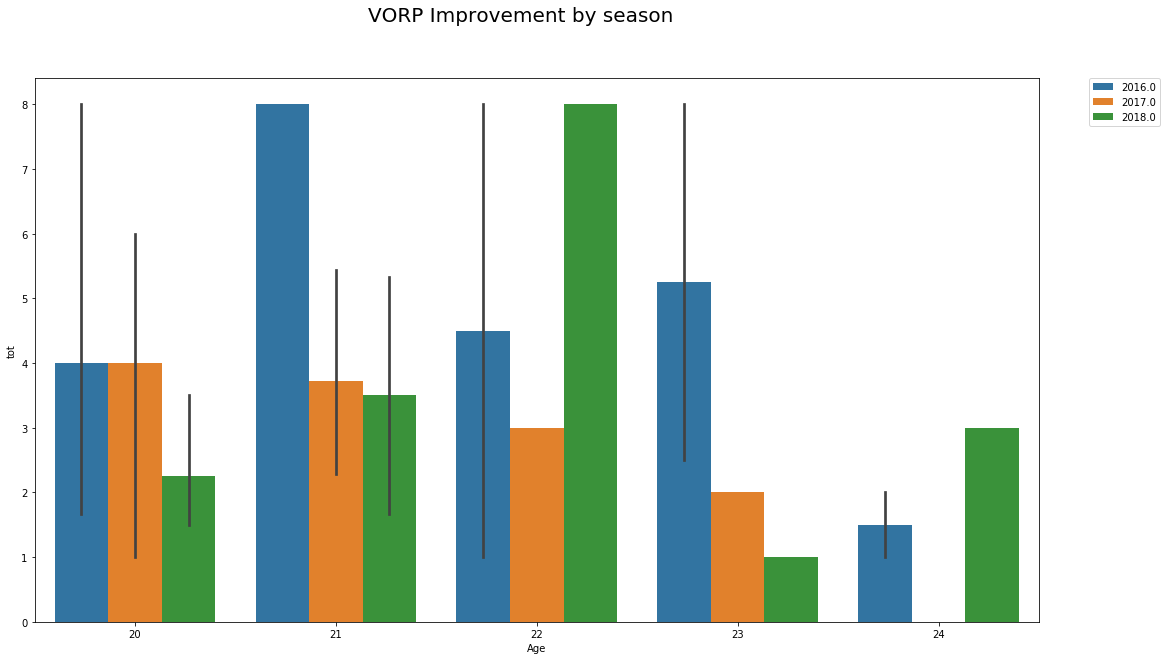

In [78]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
f, (ax) = plt.subplots(1, 1, figsize=(18, 10))
f.suptitle('VORP Improvement by season', fontsize=20)

sns.barplot(data=z_merge,
                x="Age", 
                y='tot',   
                ax=ax,
                hue='DRAFT_YEAR+1_x',
                )

# ax.set_xlabel("VORP",size=15,alpha=0.8)
# ax.set_ylabel("PER",size=15,alpha=0.8);
# f.savefig("VORP_improvement.png")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

No handles with labels found to put in legend.


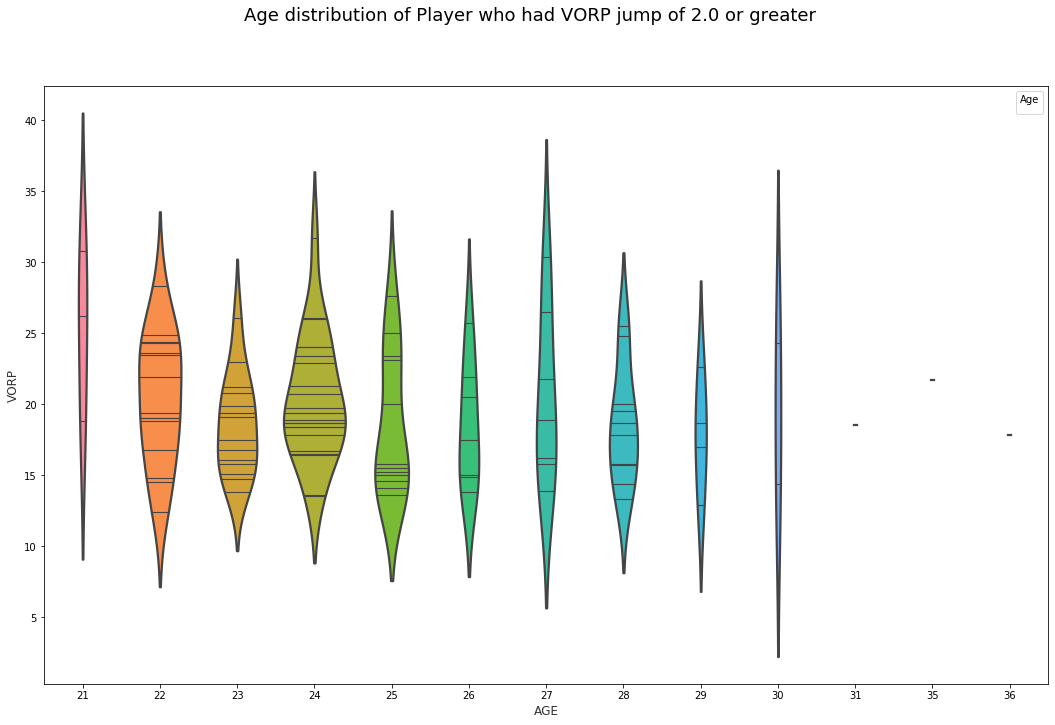

In [256]:
f, (ax) = plt.subplots(1, 1, figsize=(18, 11))
f.suptitle('Age distribution of Player who had VORP jump of 2.0 or greater', fontsize=18)

sns.violinplot(data=improvement,
               x="Age", y="PER",
               ax=ax, split=True, scale="count", 
               inner="stick", linewidth=2.25, saturation=1)

ax.set_xlabel("AGE",size=12,alpha=0.8)
ax.set_ylabel("VORP",size=12,alpha=0.8)
ax.legend(title='Age')
# ax.set(xticklabels=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]);
f.savefig("improvement_vorp_age.png")

In [354]:
eastern.groupby('Tm_x')['WS/48'].sum().sort_values(ascending=True)

Tm_x
BRK    11.599
NYK    11.871
CHO    11.898
WAS    12.249
PHI    12.728
DET    13.552
MIL    13.713
ORL    14.221
CLE    14.280
ATL    14.362
TOR    15.195
CHI    15.280
IND    16.162
BOS    16.768
MIA    17.162
Name: WS/48, dtype: float64

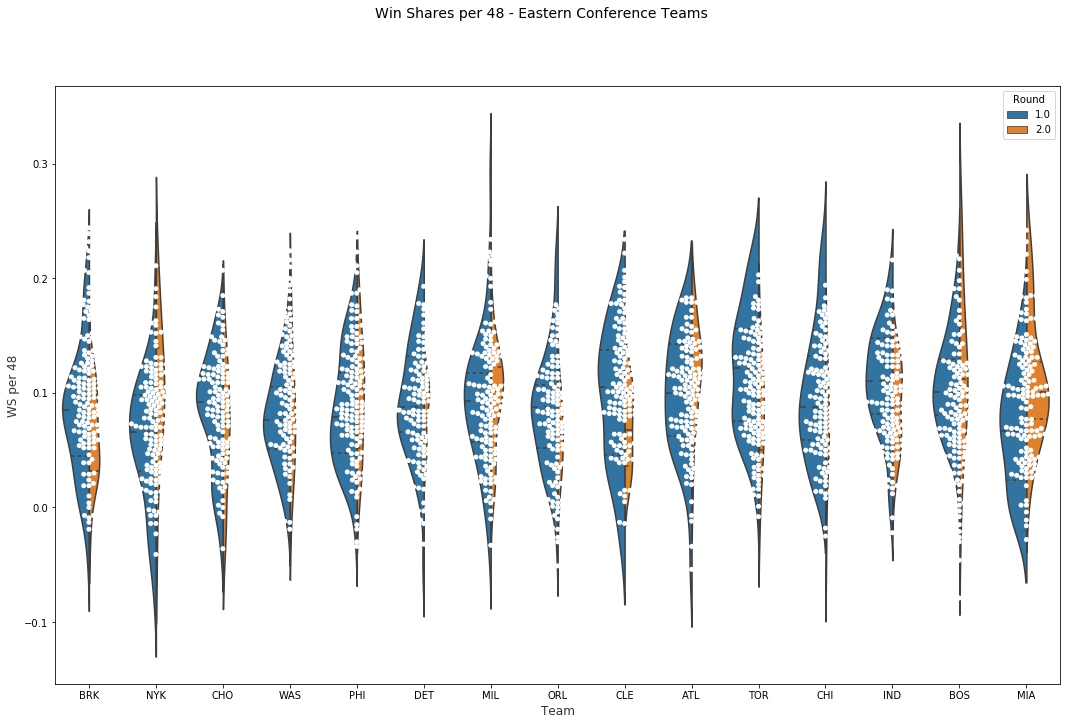

In [360]:
order = eastern.groupby('Tm_x')['WS/48'].sum().sort_values(ascending=True)
f, (ax) = plt.subplots(1, 1, figsize=(18, 11))
f.suptitle('Win Shares per 48 - Eastern Conference Teams', fontsize=14)

ax = sns.swarmplot(x="Tm_x", y="WS/48", data=eastern,
                    color="white", edgecolor="gray")
ax = sns.violinplot(data=eastern,
               x="Tm_x", y="WS/48", hue='draft_round',
               ax=ax, scale="count", inner="quart", split="draft_round", order=order.index)

ax.set_xlabel("Team",size=12,alpha=0.8)
ax.set_ylabel("WS per 48",size=12,alpha=0.8);
ax.legend(title='Round');
# ax.set(xticklabels=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]);
f.savefig("ws_per48_eastern.png")

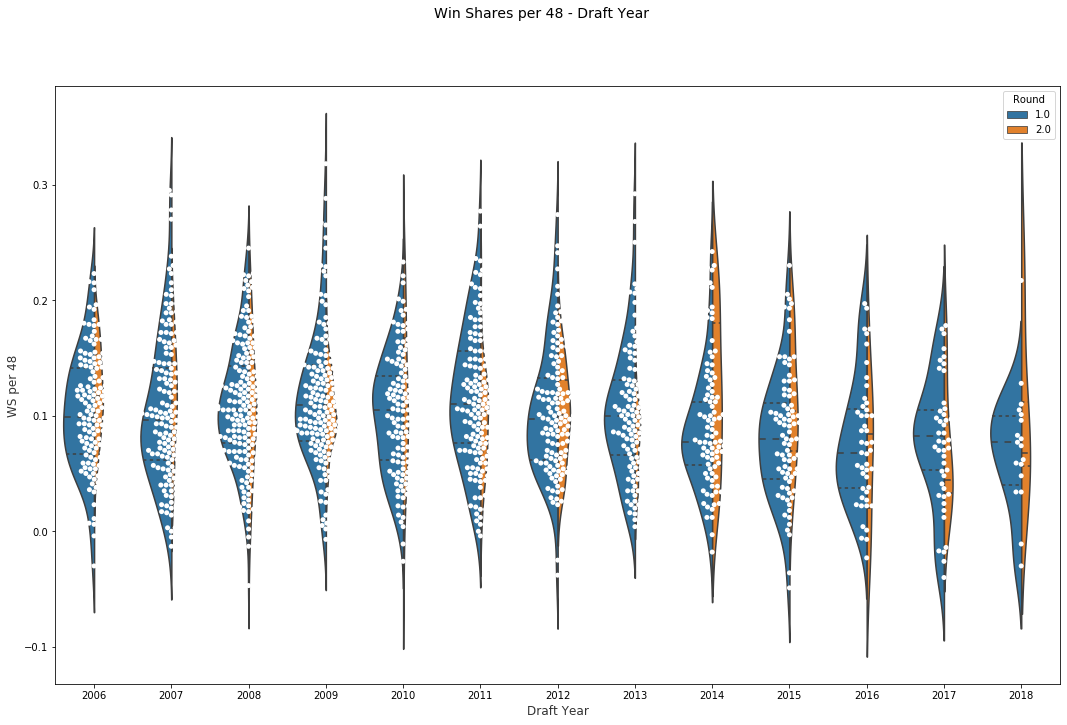

In [274]:
f, (ax) = plt.subplots(1, 1, figsize=(18, 11))
f.suptitle('Win Shares per 48 - Draft Year', fontsize=14)

ax = sns.violinplot(data=nba,
               x="DRAFT_YEAR+1", y="WS/48", hue='draft_round',
               ax=ax, split=True, scale="count", inner="quart")
ax = sns.swarmplot(x="DRAFT_YEAR+1", y="WS/48", data=nba,
                    color="white", edgecolor="gray")

ax.set_xlabel("Draft Year",size=12,alpha=0.8)
ax.set_ylabel("WS per 48",size=12,alpha=0.8)
ax.legend(title='Round')
ax.set(xticklabels=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]);
f.savefig("ws_per48_dftYR_byRound.png")

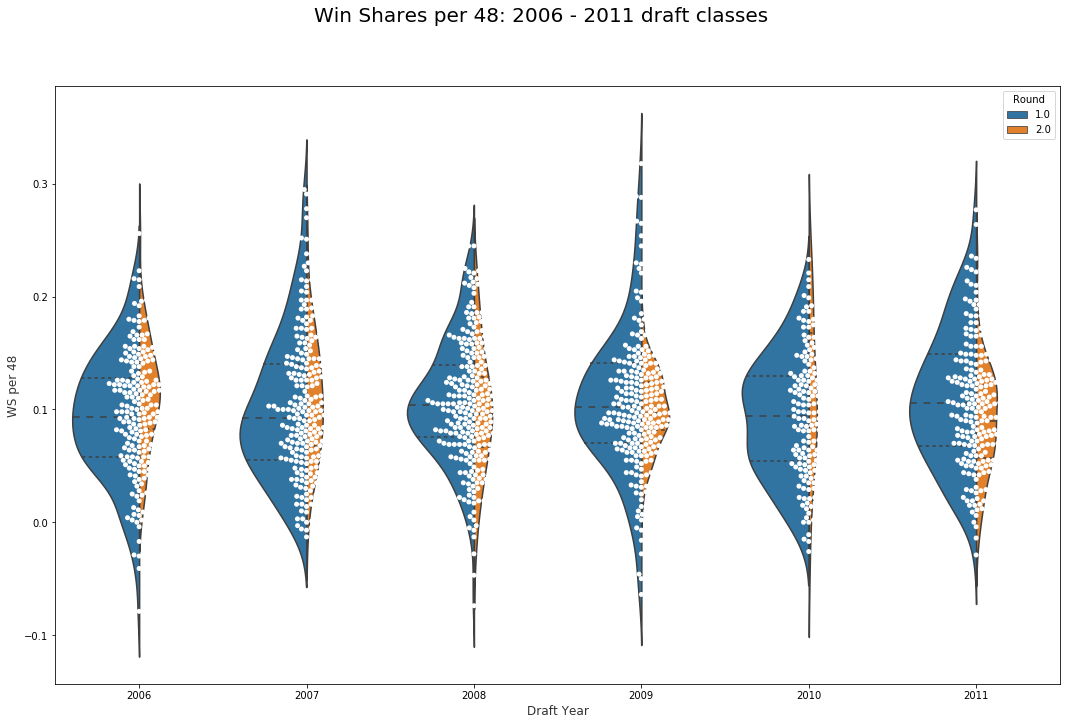

In [275]:
f, (ax) = plt.subplots(1, 1, figsize=(18, 11))
f.suptitle('Win Shares per 48: 2006 - 2011 draft classes', fontsize=20)

ax = sns.violinplot(data=half_1,
               x="DRAFT_YEAR+1", y="WS/48", hue='draft_round',
               ax=ax, split=True, inner="quart", scale="count")
ax = sns.swarmplot(x="DRAFT_YEAR+1", y="WS/48", data=half_1,
                    color="white", edgecolor="gray")

ax.set_xlabel("Draft Year",size=12,alpha=0.8)
ax.set_ylabel("WS per 48",size=12,alpha=0.8)
ax.legend(title='Round')
ax.set(xticklabels=[2006, 2007, 2008, 2009, 2010, 2011]);
f.savefig("ws_per48_dftYR_byRound_1.png")

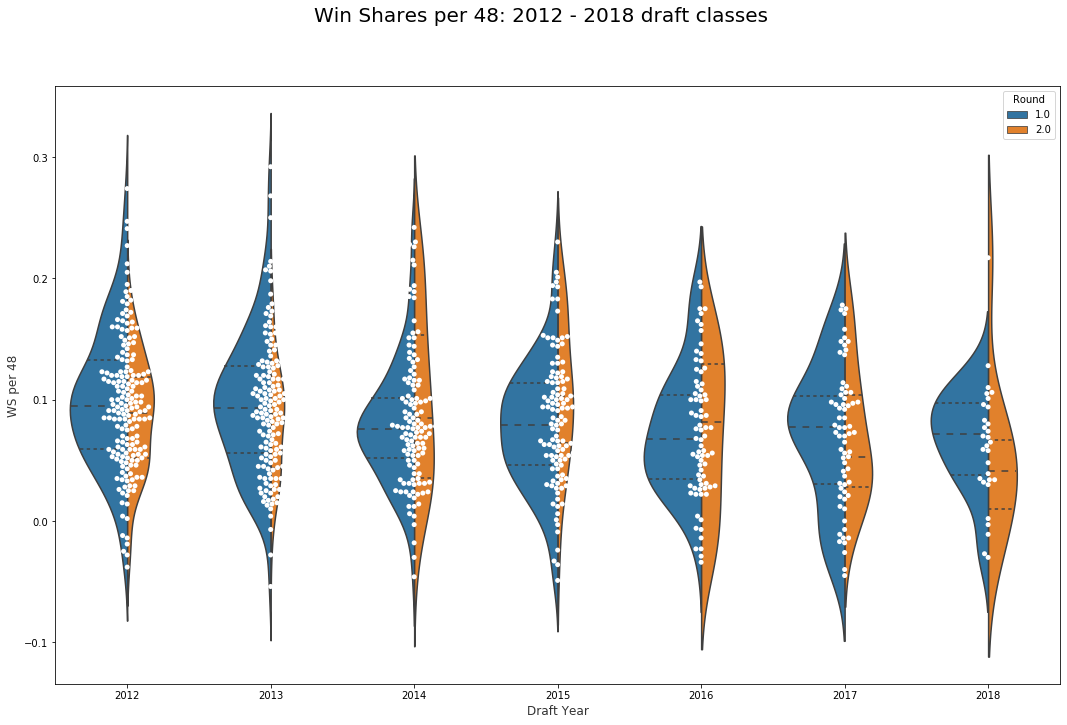

In [282]:
f, (ax) = plt.subplots(1, 1, figsize=(18, 11))
f.suptitle('Win Shares per 48: 2012 - 2018 draft classes', fontsize=20)

ax = sns.violinplot(data=half_2,
               x="DRAFT_YEAR+1", y="WS/48", hue='draft_round',
               ax=ax, split=True, inner="quart", orient="v", scale="count")
ax = sns.swarmplot(x="DRAFT_YEAR+1", y="WS/48", data=half_2,
                    color="white", edgecolor="gray")


ax.set_xlabel("Draft Year",size=12,alpha=0.8)
ax.set_ylabel("WS per 48",size=12,alpha=0.8)
ax.legend(title='Round')
ax.set(xticklabels=[2012, 2013, 2014, 2015, 2016, 2017, 2018]);
f.savefig("ws_per48_dftYR_byRound_2.png")

In [281]:
nba.loc[nba['SEASON'] == 2019].groupby(['DRAFT_YEAR+1', 'Player_name'])['PER', 'WS/48', 'VORP', "Pk"].agg(sum)

PER  WS/48  VORP    Pk
DRAFT_YEAR+1 Player_name                                      
2007.0       J.J. Redick               15.1  0.118   0.8  11.0
             Kyle Lowry                16.5  0.144   2.8  24.0
             LaMarcus Aldridge         22.9  0.167   2.5   2.0
             P.J. Tucker                9.2  0.086   2.3  35.0
             Paul Millsap              17.9  0.155   2.1  47.0
             Rajon Rondo               12.1  0.047   0.1  21.0
             Rudy Gay                  17.5  0.115   1.4   8.0
2008.0       Al Horford                20.2  0.181   3.4   3.0
             Jared Dudley               7.8  0.070   0.4  22.0
             Jeff Green                13.6  0.083   0.4   5.0
             Kevin Durant              24.2  0.204   4.3   2.0
             Marc Gasol                16.9  0.104   2.1  48.0
             Marco Belinelli           11.9  0.065   0.0  18.0
             Mike Conley               21.4  0.164   3.2   4.0
             Thaddeus Young            16.2  0.133   3.1  12.0
2009.0       Brook Lopez               14.6  0.138   2.8  10.0
             D.J. Augustin             15.7  0.146   1.0   9.0
             Danilo Gallinari          21.0  0.191   2.6   6.0
             DeAndre Jordan            18.0  0.162   1.6  35.0
             Derrick Rose              19.5  0.102   0.5   1.0
             Eric Gordon               12.2  0.059  -0.5   7.0
             JaVale McGee              21.8  0.171   1.7  18.0
             Nicolas Batum             11.9  0.076   1.7  25.0
             Robin Lopez               15.9  0.081   0.4  15.0
             Russell Westbrook         21.1  0.124   5.6   4.0
             Serge Ibaka               18.7  0.146   1.3  24.0
2010.0       Blake Griffin             21.0  0.147   4.4   1.0
             Danny Green               13.0  0.128   2.7  46.0
             Darren Collison           16.7  0.153   1.8  21.0
             DeMar DeRozan             19.6  0.112   2.0   9.0
             DeMarre Carroll           12.1  0.088   0.1  27.0
             James Harden              30.6  0.254   9.9   3.0
             James Johnson             10.9  0.062   0.1  16.0
             Jeff Teague               15.4  0.085  -0.1  19.0
             Jonas Jerebko             13.5  0.130   0.6  39.0
             Jrue Holiday              19.4  0.108   2.9  17.0
             Patrick Beverley          11.8  0.108   2.3  42.0
             Patty Mills               13.2  0.087   0.7  55.0
             Ricky Rubio               14.0  0.095   0.9   5.0
             Stephen Curry             24.4  0.199   4.9   7.0
             Taj Gibson                17.8  0.144   1.3  26.0
             Tyreke Evans              11.5  0.010  -0.6   4.0
2011.0       Al-Farouq Aminu           13.2  0.121   1.7   8.0
             Avery Bradley              5.5 -0.011  -0.4  19.0
             Derrick Favors            21.8  0.215   2.8   3.0
             Ed Davis                  17.3  0.191   0.9  13.0
             Eric Bledsoe              19.3  0.173   3.2  18.0
             Evan Turner               11.6  0.060   0.1   2.0
             Gordon Hayward            15.6  0.126   1.2   9.0
             Hassan Whiteside          23.5  0.180   1.2  33.0
             John Wall                 18.0  0.051   0.5   1.0
             Lance Stephenson          11.8  0.049   0.0  40.0
             Nemanja Bjelica           15.4  0.122   1.8  35.0
             Paul George               23.3  0.201   5.3  10.0
2012.0       Bojan Bogdanović          16.1  0.126   1.3  31.0
             Cory Joseph               11.0  0.081   0.8  29.0
             Dāvis Bertāns             13.0  0.118   1.3  42.0
             E'Twaun Moore             11.5  0.055  -0.1  55.0
             Enes Kanter               21.8  0.143   0.8   3.0
             Iman Shumpert             10.1  0.054   0.4  17.0
             Jimmy Butler              19.8  0.172   2.3  30.0
             Kawhi Leonard             25.8  0.224   3.6  15.0
        

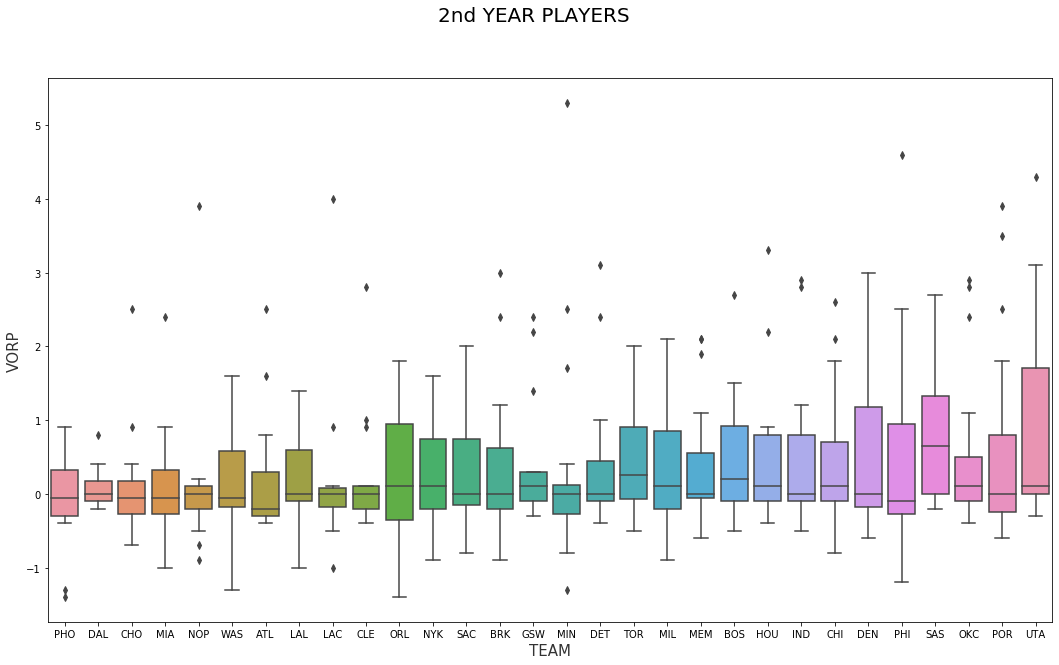

In [9]:
order = second_year.groupby('Tm_x')['VORP'].sum().sort_values(ascending=True)
f, (ax) = plt.subplots(1, 1, figsize=(18, 10))
f.suptitle('2nd YEAR PLAYERS', fontsize=20)

sns.boxplot(data=second_year,
               x="Tm_x", 
               y='VORP',   
               ax=ax,
               order=order.index)

ax.set_xlabel("TEAM",size=15,alpha=0.8)
ax.set_ylabel("VORP",size=15,alpha=0.8);
f.savefig("2nd_year_best.png")

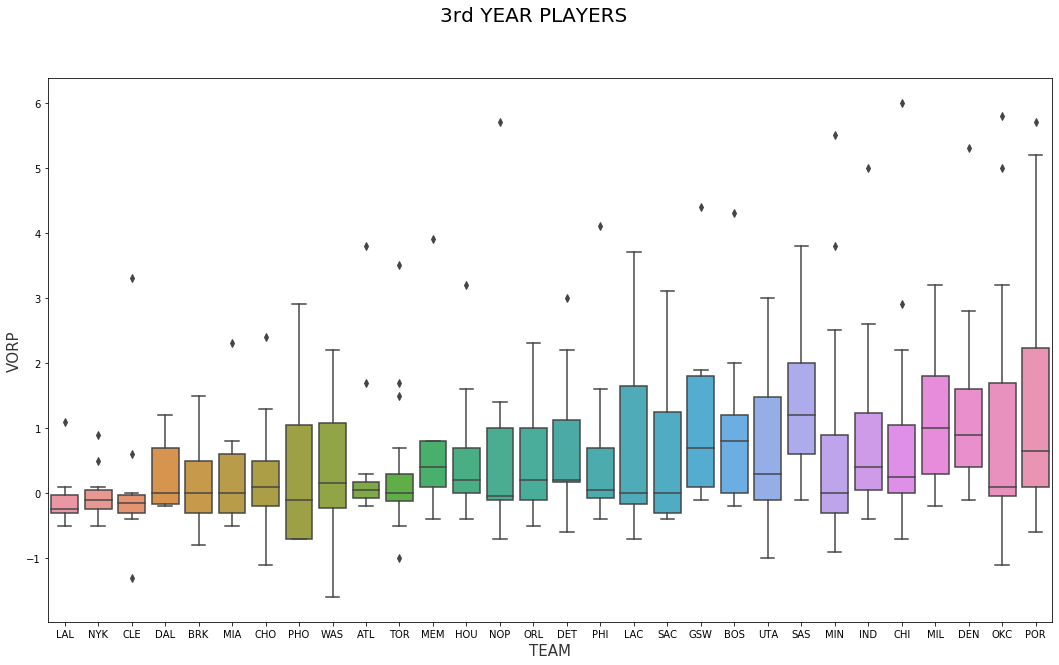

In [10]:
order = third_year.groupby('Tm_x')['VORP'].sum().sort_values(ascending=True)
f, (ax) = plt.subplots(1, 1, figsize=(18, 10))
f.suptitle('3rd YEAR PLAYERS', fontsize=20)

sns.boxplot(data=third_year,
               x="Tm_x", 
               y='VORP',   
               ax=ax,
               order=order.index)

ax.set_xlabel("TEAM",size=15,alpha=0.8)
ax.set_ylabel("VORP",size=15,alpha=0.8);
f.savefig("3rd_year_best.png")

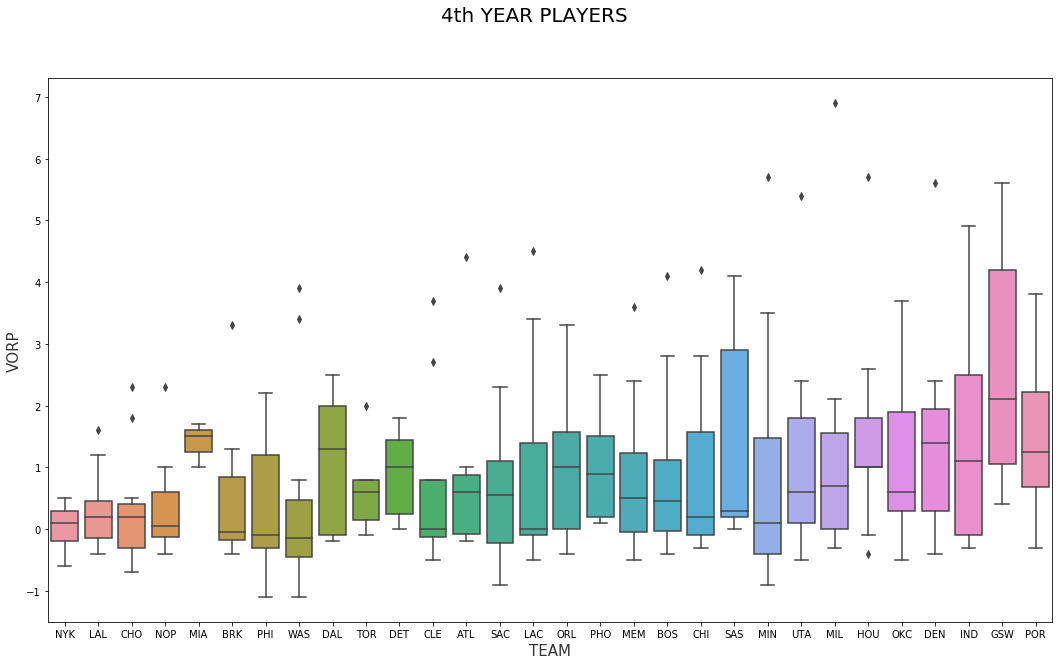

In [11]:
order = fourth_year.groupby('Tm_x')['VORP'].sum().sort_values(ascending=True)
f, (ax) = plt.subplots(1, 1, figsize=(18, 10))
f.suptitle('4th YEAR PLAYERS', fontsize=20)

sns.boxplot(data=fourth_year,
               x="Tm_x", 
               y='VORP',   
               ax=ax,
               order=order.index)

ax.set_xlabel("TEAM",size=15,alpha=0.8)
ax.set_ylabel("VORP",size=15,alpha=0.8);
f.savefig("4th_year_best.png")

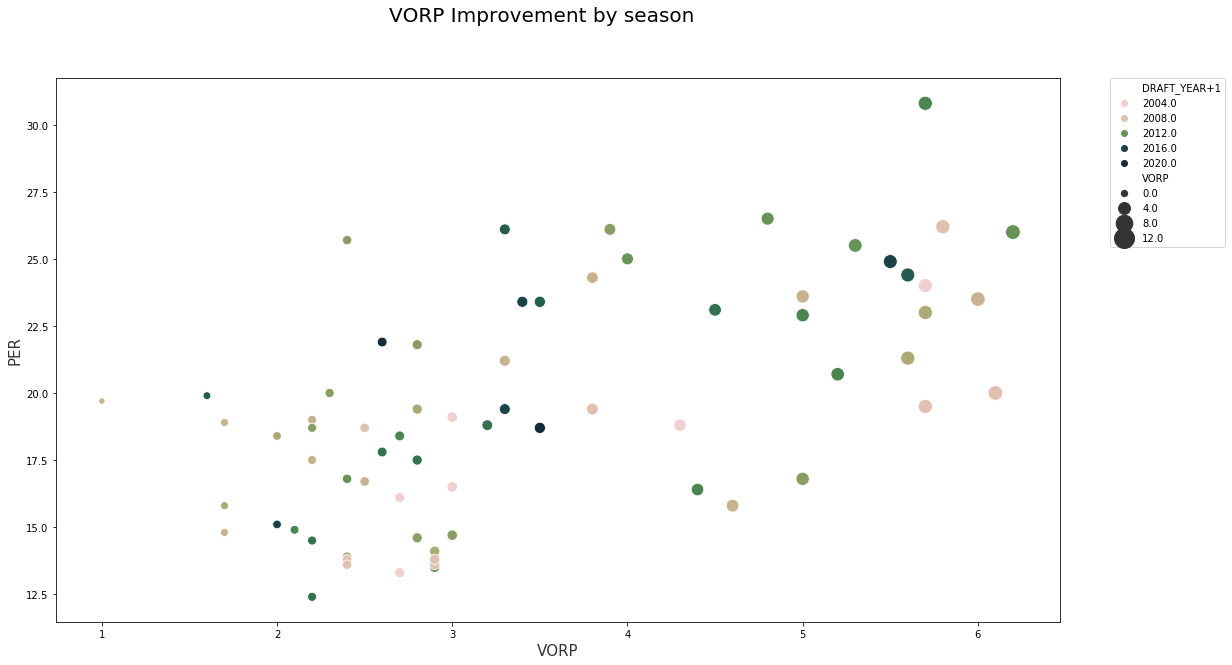

In [12]:
# order = second_year.groupby('Tm_x')['VORP'].sum().sort_values(ascending=True)
cmap = sns.cubehelix_palette(n_colors=2, rot=-.8, as_cmap=True)
f, (ax) = plt.subplots(1, 1, figsize=(18, 10))
f.suptitle('VORP Improvement by season', fontsize=20)

sns.scatterplot(data=improvement,
                x="VORP", 
                y='PER',   
                ax=ax,
                hue='DRAFT_YEAR+1',
                size="VORP", sizes=(40, 400), palette=cmap)

ax.set_xlabel("VORP",size=15,alpha=0.8)
ax.set_ylabel("PER",size=15,alpha=0.8);
f.savefig("VORP_improvement.png")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [43]:
improvement.sort_values(by="Pk", ascending=True)

,Player_name,player_id,SEASON,Tm_x,DRAFT_YEAR+1,Draft_team,Pk,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,College,Yrs,PTS,TRB,AST,FG%,3P%,FT%,PPG,RPG,APG,draft_round
946,Kyrie Irving,irvinky01,2018,BOS,2012.0,CLE,1.0,PG,25,60,1931,25.0,0.610,0.374,0.240,1.9,10.8,6.4,30.7,1.7,0.7,10.4,31.0,6.3,2.7,8.9,0.222,6.9,-0.7,6.2,4.0,Duke University,8.0,11294.0,1852.0,2884.0,0.465,0.390,0.875,22.2,3.6,5.7,1.0
1190,Karl-Anthony Towns,townska01,2018,MIN,2016.0,MIN,1.0,C,22,82,2918,24.9,0.646,0.243,0.343,9.3,30.9,20.0,10.8,1.1,3.5,10.5,22.9,10.6,3.4,14.0,0.230,4.4,1.1,5.5,5.5,University of Kentucky,4.0,7187.0,3831.0,839.0,0.537,0.392,0.836,22.3,11.9,2.6,1.0
2326,Anthony Davis,davisan02,2015,NOP,2013.0,NOH,1.0,PF,21,68,2455,30.8,0.591,0.010,0.384,8.0,24.1,16.1,11.6,2.1,6.2,6.3,27.8,9.9,4.2,14.0,0.274,4.2,3.0,7.1,5.7,University of Kentucky,7.0,11059.0,4906.0,982.0,0.517,0.314,0.795,23.7,10.5,2.1,1.0
4486,Derrick Rose,rosede01,2011,CHI,2009.0,CHI,1.0,PG,22,81,3026,23.5,0.550,0.241,0.348,3.2,9.4,6.4,38.7,1.5,1.3,13.1,32.2,8.3,4.8,13.1,0.208,5.8,0.1,5.9,6.0,University of Memphis,10.0,10281.0,1910.0,3056.0,0.453,0.304,0.824,18.8,3.5,5.6,1.0
1089,Victor Oladipo,oladivi01,2018,IND,2014.0,ORL,2.0,SG,25,75,2552,23.1,0.577,0.323,0.274,2.1,15.1,8.6,21.2,3.5,2.0,12.7,30.1,4.3,4.0,8.2,0.155,3.6,1.3,4.9,4.5,Indiana University,6.0,7028.0,1859.0,1589.0,0.443,0.352,0.793,17.5,4.6,4.0,1.0
4707,Kevin Durant,duranke01,2010,OKC,2008.0,SEA,2.0,SF,21,82,3239,26.2,0.607,0.210,0.504,3.8,17.9,11.0,13.5,1.8,1.9,11.7,32.0,11.1,5.0,16.1,0.238,4.9,0.2,5.1,5.8,University of Texas at Austin,12.0,22940.0,5992.0,3486.0,0.493,0.381,0.883,27.0,7.1,4.1,1.0
573,D'Angelo Russell,russeda01,2019,BRK,2016.0,LAL,2.0,PG,22,81,2448,19.4,0.533,0.419,0.135,2.3,11.2,6.8,41.3,1.9,0.6,13.6,31.9,2.4,2.6,5.0,0.097,3.9,-0.5,3.4,3.3,Ohio State University,4.0,4493.0,999.0,1381.0,0.419,0.353,0.762,16.5,3.7,5.1,1.0
5033,LaMarcus Aldridge,aldrila01,2009,POR,2007.0,CHI,2.0,PF,23,81,3004,19.1,0.529,0.023,0.269,9.5,15.6,12.5,9.3,1.4,2.0,8.0,23.7,6.1,3.3,9.5,0.151,1.2,0.7,1.9,3.0,University of Texas at Austin,13.0,18598.0,7968.0,1856.0,0.491,0.283,0.810,19.6,8.4,2.0,1.0
2091,Otto Porter,porteot01,2016,WAS,2014.0,WAS,3.0,SF,22,75,2276,14.5,0.564,0.372,0.176,4.7,14.7,9.6,7.9,2.2,1.1,8.3,16.2,3.0,2.7,5.6,0.119,0.8,1.0,1.8,2.2,Georgetown University,6.0,4383.0,1989.0,593.0,0.483,0.405,0.793,11.0,5.0,1.5,1.0
4781,Al Horford,horfoal01,2010,ATL,2008.0,ATL,3.0,C,23,81,2845,19.4,0.594,0.001,0.319,9.6,23.3,16.4,10.4,1.1,2.4,11.2,17.6,6.9,3.9,10.9,0.183,1.5,1.9,3.3,3.8,University of Florida,12.0,11092.0,6597.0,2548.0,0.525,0.368,0.754,14.1,8.4,3.2,1.0


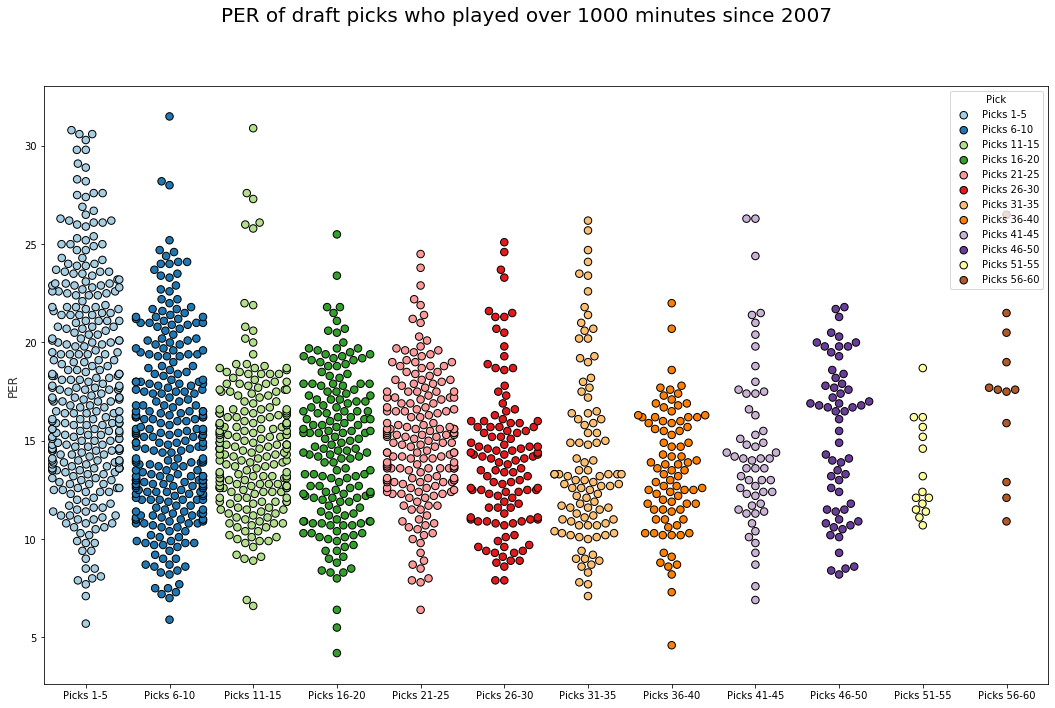

In [255]:
order = nba.groupby('binned_picks_2')['PER'].sum().sort_values(ascending=False)
f, (ax) = plt.subplots(1, 1, figsize=(18, 11))
f.suptitle('PER of draft picks who played over 1000 minutes since 2007 ', fontsize=20)

# ax = sns.violinplot(data=nba,
#                x="binned_picks_2", y="PER",
#                ax=ax, scale="count", 
#                inner="quart", linewidth=2.25, saturation=1, hue="binned_picks_2", order=order.index,
#                    )
ax = sns.swarmplot(x="binned_picks_2", y="PER", data=nba,
                    color="white", edgecolor="black", 
                   linewidth=1, hue="binned_picks_2", 
                   palette=("Paired"), size=7.5)


ax.set_xlabel("",size=12,alpha=0.8)
ax.set_ylabel("PER",size=12,alpha=0.8);
ax.set(xticklabels=["Picks 1-5", 'Picks 6-10', 'Picks 11-15', 'Picks 16-20', 'Picks 21-25', 'Picks 26-30', 'Picks 31-35', 'Picks 36-40', 'Picks 41-45', 'Picks 46-50', 'Picks 51-55', 'Picks 56-60']);
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5);
ax.legend(title='Pick', labels=["Picks 1-5", 'Picks 6-10', 'Picks 11-15', 'Picks 16-20', 'Picks 21-25', 'Picks 26-30', 'Picks 31-35', 'Picks 36-40', 'Picks 41-45', 'Picks 46-50', 'Picks 51-55', 'Picks 56-60']);
f.savefig("PER_by_pick_all.png")

In [189]:
bins = [0, 10, 20, 30, 40, 50, 60]
bins_2 = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
nba['binned_picks'] = pd.cut(nba['Pk'], bins)
nba['binned_picks_2'] = pd.cut(nba['Pk'], bins_2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
